In [1]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os
import time
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.optimize import curve_fit
from IPython.display import clear_output, display
import matplotlib.colors as colors

import h5py


from alvra_tools import *
from alvra_tools.channels import *
#from alvra_tools.channels_raw import *

In [2]:
# Choose a pedestal file (usually located in /sf/alvra/data/*pgroup*/res/JF_pedestals) 
# if you do not want to use the closest in time

# pedestal_file = "/sf/alvra/data/p17983/res/JF_pedestals/pedestal_20190727_2115.JF02T09V02.res.h5"
pedestal_file = None

In [3]:
#scan_name ="RuFoil_RIXS"
scan_name ="XES-L-cystine-timescan"
scan_range = ".run001785-001801"

DIR = "/sf/alvra/data/p18387/raw/scan_data/" + scan_name + "/"
#DIR = "/sf/alvra/data/p18387/raw/XES-L-cystine-2ps/"  
#DIR = "/sf/alvra/data/p18442/raw/scan_data/RuBpy_RIXS_6/"

#DIR_json = "/das/work/p17/p17983/Example_data/res/scan_info/"
DIR_json = "/sf/alvra/data/p18387/res/scan_info/"
#DIR_json = "/sf/alvra/data/p18387/raw/XES_pellet/"


#scan_range = ".run001515-001545"


!ls -lah -t $DIR

!hostname

listfile = os.listdir(DIR)
number_files = len(listfile)
print ("There are",number_files,"files in the folder", DIR)

total 3.3T
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:24 run_001762.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:24 run_001761.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:23 run_001769.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:23 run_001768.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:22 run_001767.JF02T09V02.h5
-rw-r--r--.  1 root p18387  40G Feb 23 12:22 run_001702.JF02T09V02.h5
-rw-r--r--.  1 root p18387  40G Feb 23 12:21 run_001707.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001816.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001809.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001818.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001802.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001817.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001813.JF02T09V02.h5
-rw-r--r--.  1 root p18387 9.8G Feb 23 12:21 run_001815.JF02T09V02.h5
-rw-r--r-

ra-c-004.psi.ch
There are 348 files in the folder /sf/alvra/data/p18387/raw/scan_data/XES-L-cystine-timescan/


/sf/alvra/data/p18387/raw/scan_data/XES-L-cystine-timescan/run_001712.JF02T09V02.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18387/res/JF_pedestals/pedestal_20200223_0716.JF02T09V02.res.h5
    mtime difference: 4:30:04.759251
(514, 9318)
It took 2.7 seconds to process this file


<IPython.core.display.Javascript object>


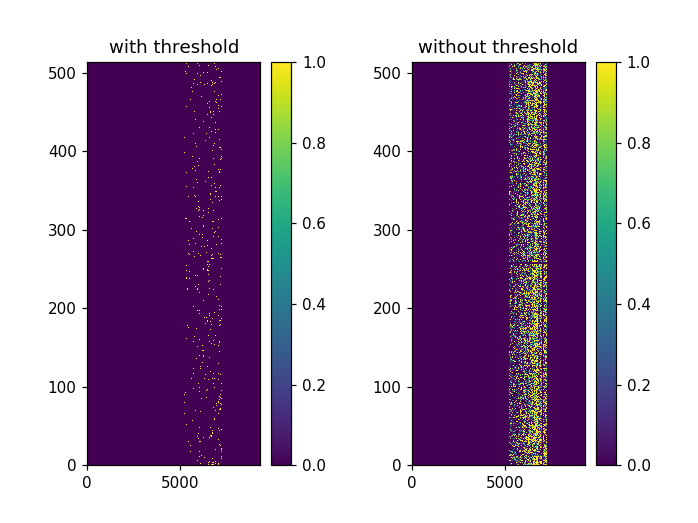

In [4]:
# First we load the first images of a file to check if everything is fine with the pedestal &  files (check high True or False)
# We can see also how the ROIs look like (will be useful later)
clock = Clock()

#fileName = "run_001381.JF02T09V02.h5"
fileName = "run_001712.JF02T09V02.h5"
#fileName = "run_000786.JF02T09V02.h5"

#fileName = "CytC_Fe3_timescan_5uJ_288nm_7122eV_003_step0015.JF02T09V01.h5"

print(DIR + fileName)

nframes = 10
#nframes = images.shape[0]
total = 0
total_thr = 0

with ju.File(DIR + fileName, pedestal_file=pedestal_file) as juf:
    pulse_ids = juf["pulse_id"][:]

    for i in range(nframes):
        image = juf[i, :]
        image_thr = image.copy()
        image_thr[image < 1] = 0
        total_thr += image_thr
        total += image
        #total /= nframes
    
print (total_thr.shape)
print ("It took", clock.tick(), "seconds to process this file")

#roi = [[225, 325], [6950, 7075]]
#roi = [[225, 325], [7900, 8450]]
#roi = [[0, total_corr.shape[0]], [0, total_corr.shape[1]]]

plt.figure()
plt.subplots_adjust(wspace=0.5)
plt.subplot(121)
plt.imshow(total_thr, origin="lower", aspect='auto', vmin=0, vmax=1)
plt.title("with threshold")
plt.colorbar()
plt.subplot(122)
plt.imshow(total, origin="lower", aspect='auto', vmin=0, vmax=1)
plt.title("without threshold")
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


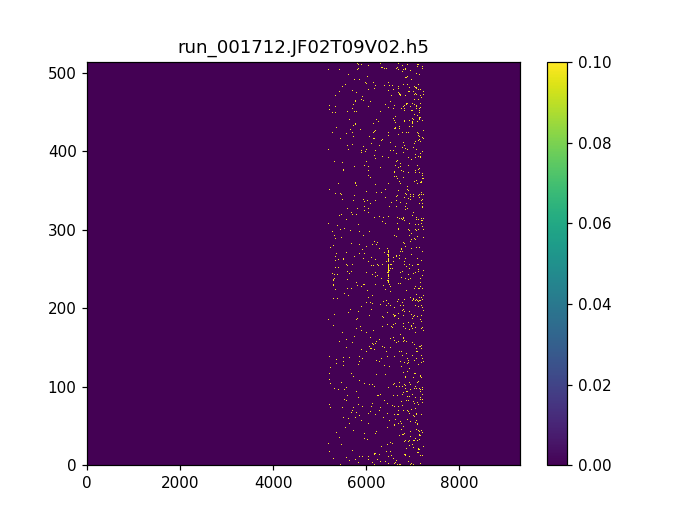

In [5]:
plt.figure()
plt.imshow(total_thr, origin="lower", aspect='auto', vmin=0, vmax=0.1)
plt.title(fileName)
plt.colorbar()
plt.show()

# New script in the next cell (single file)

In [6]:
files = ["run_001712"]
#files = ["run_003179"]
#files = ["run_000042"]

#roi1 = (5000, 5200, 220, 290) # Ru ROIs
#roi2 = (5000, 5200, 290, 360)
roi1 = (6450, 6550, 220, 300)
roi2 = (5450, 5700, 220, 300)

threshold_low = 2.0
threshold_high = 10

Timezero = 194.6   # position of Timezero on PP delay (in mm!)
######################################################################################
start_time = time.time()
spectrum_ON_roi1 = 0
spectrum_OFF_roi1 = 0
spectrum_ON_roi2 = 0
spectrum_OFF_roi2 = 0
energy_eV = 0
Delay_mm_single = 0
        
for f in files:
    JF_single_file = DIR + f + ".JF02T09V02.h5"
    BS_single_file = DIR + f + ".BSREAD.h5"
    print("Processing file %s" % (JF_single_file))
    
#    photon_range = (6, 7)

    nshots = 10000  # put this to None for ALL images
    #nshots = None

    images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
    load_crop_JF_data_on_off(JF_single_file, roi1, roi2, 50, 25, pedestal_file=pedestal_file, nshots=nshots)
    
    delay, pids = load_single_channel_pulseID(BS_single_file, channel_delay, 50)
    delay = [x for x in delay if (x > 0)]
    Delay_mm_single = np.mean(delay)
    Delay_ps_single = (Delay_mm_single - Timezero)*2/(3e8*1e3*1e-12) # in ps, change to right t0 !
    
#    Izero_pump, Izero_unpump, energy_eV, pulseIDs = \
#    load_FEL_pp_pulseID(BS_single_file, channel_energy, 50, 25, 50)  
    
    images_ON_roi1_thr = images_ON_roi1.copy()
    images_ON_roi1_thr[images_ON_roi1 < threshold_low] = 0
    images_ON_roi1_thr[images_ON_roi1 > threshold_high] = 0
#   images_ON_roi1 = convert_to_photon_num_range(images_ON_roi1)

    images_ON_roi2_thr = images_ON_roi2.copy()
    images_ON_roi2[images_ON_roi2 < threshold_low] = 0
    images_ON_roi2[images_ON_roi2 > threshold_high] = 0
#   images_ON_roi2 = convert_to_photon_num_range(images_ON_roi2)

    images_OFF_roi1_thr = images_OFF_roi1.copy()
    images_OFF_roi1_thr[images_OFF_roi1 < threshold_low] = 0
    images_OFF_roi1_thr[images_OFF_roi1 > threshold_high] = 0
#   images_OFF_roi1 = convert_to_photon_num_range(images_OFF_roi1)

    images_OFF_roi2_thr = images_OFF_roi2.copy()
    images_OFF_roi2[images_OFF_roi2 < threshold_low] = 0
    images_OFF_roi2[images_OFF_roi2 > threshold_high] = 0
#   images_OFF_roi2 = convert_to_photon_num_range(images_OFF_roi2)

    spectrum_ON_roi1  = images_ON_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_OFF_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2  = images_ON_roi2.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_OFF_roi2.sum(axis = 1).sum(axis = 0)
    
print ("Job done! It took", round((time.time() - start_time), 2), "seconds to process", len(files), "file" if len(files) == 1 else "files")

Processing file /sf/alvra/data/p18387/raw/scan_data/XES-L-cystine-timescan/run_001712.JF02T09V02.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18387/res/JF_pedestals/pedestal_20200223_0716.JF02T09V02.res.h5
    mtime difference: 4:30:04.759251
Job done! It took 36.58 seconds to process 1 file


In [7]:
files

['run_001712']

In [8]:
def edge_removal(module_edge, roi_removal, array):
    index_edge = module_edge - roi_removal[0]
    array_input = array.copy()
    print (array[index_edge-1:index_edge+3])
    array[index_edge] = array[index_edge-1]/2
    array[index_edge-1] = array[index_edge-1]/2

    array[index_edge+1] = array[index_edge+2]/2
    array[index_edge+2] = array[index_edge+2]/2 
    print (array[index_edge-1:index_edge+3])
    return array, array_input

In [9]:
spectrum_ON_roi1, spectrum_ON_roi1_orig = edge_removal(6472, roi1, spectrum_ON_roi1) 
spectrum_OFF_roi1, spectrum_OFF_roi1_orig = edge_removal(6472, roi1, spectrum_OFF_roi1) 

[37068.227     0.        0.    65268.74 ]
[18534.113 18534.113 32634.37  32634.37 ]
[37123.297     0.        0.    65041.14 ]
[18561.648 18561.648 32520.57  32520.57 ]


### ROI1

<IPython.core.display.Javascript object>


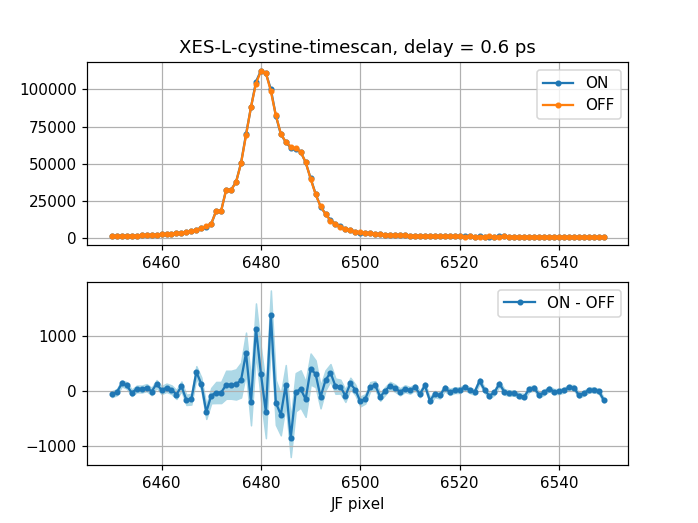

In [10]:
bin_ = 1   # change the bin size if wanted, 1 is every pixel

spectra_on = spectrum_ON_roi1.copy()
spectra_off = spectrum_OFF_roi1.copy()

x_axis = np.arange(roi1[0], roi1[1])

spectra_on_rebin1  = bin_sum(spectra_on,  bin_)
spectra_off_rebin1 = bin_sum(spectra_off, bin_)
x_axis_rebin1 = bin_mean(x_axis, bin_)

spectra_on_err1  = np.sqrt(spectra_on_rebin1)
spectra_off_err1 = np.sqrt(spectra_off_rebin1)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin1, spectra_on_rebin1, label="ON", marker='.')
plt.plot(x_axis_rebin1, spectra_off_rebin1, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)

low_err= (spectra_on_rebin1 - spectra_off_rebin1)-np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
high_err= (spectra_on_rebin1 - spectra_off_rebin1)+np.sqrt(spectra_on_err1**2+spectra_off_err1**2)
#x_axis_rebin1,
plt.subplot(212)
plt.plot(x_axis_rebin1,spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
#plt.plot(spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')
plt.xlabel("JF pixel")
plt.grid()


plt.legend(loc="best")
plt.fill_between(x_axis_rebin1, low_err, high_err, color='lightblue')
plt.show()

### ROI2

<IPython.core.display.Javascript object>


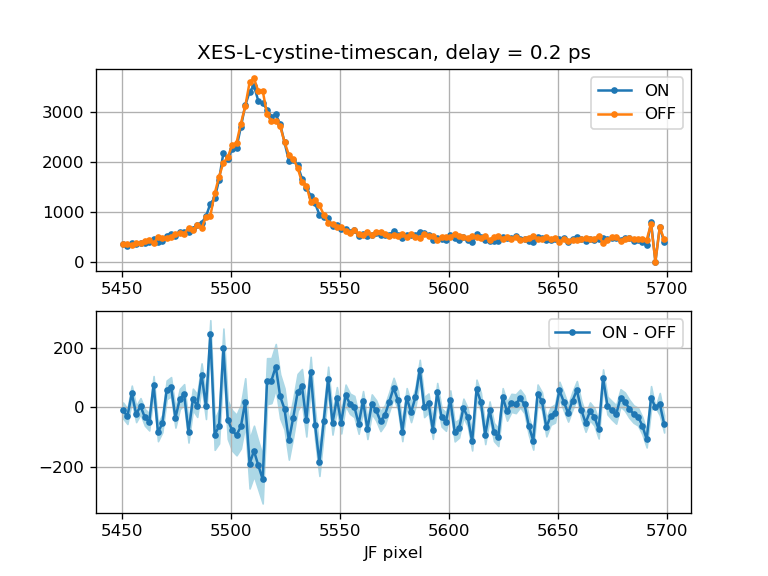

In [15]:
bin_ = 2  # change the bin size if wanted, 1 is every pixel

spectra_on = spectrum_ON_roi2.copy()
spectra_off = spectrum_OFF_roi2.copy()

x_axis = np.arange(roi2[0], roi2[1])

spectra_on_rebin2  = bin_sum(spectra_on,  bin_)
spectra_off_rebin2 = bin_sum(spectra_off, bin_)
x_axis_rebin2 = bin_mean(x_axis, bin_)

spectra_on_err2  = np.sqrt(spectra_on_rebin2)
spectra_off_err2 = np.sqrt(spectra_off_rebin2)

#spectrumAllOutFoc=spectra_on_rebin1 + spectra_off_rebin1
plt.figure()
plt.subplot(211)
plt.title(scan_name + ", delay = {} ps".format(str(np.round(Delay_ps_single,3))))
plt.plot(x_axis_rebin2, spectra_on_rebin2, label="ON", marker='.')
plt.plot(x_axis_rebin2, spectra_off_rebin2, label="OFF", marker='.')
plt.legend(loc="best")
plt.grid()

#plt.title(jf_file)

low_err= (spectra_on_rebin2 - spectra_off_rebin2)-np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
high_err= (spectra_on_rebin2 - spectra_off_rebin2)+np.sqrt(spectra_on_err2**2+spectra_off_err2**2)
#x_axis_rebin1,
plt.subplot(212)
plt.plot(x_axis_rebin2,spectra_on_rebin2 - spectra_off_rebin2, label="ON - OFF",marker='.')
plt.xlabel("JF pixel")
plt.grid()

#plt.plot(spectra_on_rebin1 - spectra_off_rebin1, label="ON - OFF",marker='.')

plt.legend(loc="best")
plt.fill_between(x_axis_rebin2, low_err, high_err, color='lightblue')
plt.show()

In [ ]:
savedir = '/das/work/p18/p18387/exported_data/'
filename_txt = savedir + "run001710_Ka.txt" 
output_matrix =[]
output_matrix = np.array(x_axis)
output_matrix = np.vstack((output_matrix, np.array(spectrum_ON_roi1)))
output_matrix = np.vstack((output_matrix, np.array(spectrum_OFF_roi1)))
#output_matrix = np.array()
#output_matrix = np.vstack((output_matrix, np.array(spectrum_ON_roi2)))
#output_matrix = np.vstack((output_matrix, np.array(spectrum_OFF_roi2)))

np.savetxt(filename_txt, np.transpose(output_matrix))

# New script in the next cell (scans) 

In [29]:
print (DIR_json + scan_name + scan_range + ".json")

/sf/alvra/data/p18387/res/scan_info/XES-L-cystine-timescan.run001785-001801.json


In [31]:
scan_name = "XES-L-cystine-timescan"          # you need to change only this name

#roi1 = (5000, 5200, 220, 290)
#roi2 = (5000, 5200, 290, 360) #Ru ROIs
roi1 = (6450, 6550, 220, 300)
roi2 = (5450, 5700, 220, 300)
threshold_low = 2.0
threshold_high = 10

######################################################################################

fname_scan = DIR_json + scan_name + scan_range + ".json"
scan_data = load_scan_data(fname_scan)

Energy_eV = []
Delay_mm = []
XAS_roi1 = []
XAS_roi1_on = []
Error_XAS_roi1 = []
XAS_roi2 = []
Error_XAS_roi2 = []
RIXS_transient_roi1 = []
RIXS_transient_roi2 = []
Error_transient_roi1 = []
Error_transient_roi2 = []
RIXS_unpumped_roi1 = []
RIXS_unpumped_roi2 = []
Error_unpumped_roi1 = []
Error_unpumped_roi2 = []
RIXS_pumped_roi1 = []
RIXS_pumped_roi2 = []
Error_pumped_roi1 = []
Error_pumped_roi2 = []
XAS_transient_roi1=[]

XES_transient_roi1 =[]
XES_1D = []

clock = Clock()
num_scan_files = len(scan_data)
print("\nProcessing", num_scan_files, "total files")

for i, (bs, fn) in enumerate(scan_data):
#for i in range(0,4):
    clear_output(wait=True)
    fn2 = fn.split(".JF06T32V01.h5")[0] + ".JF02T09V02.h5"
    fn = fn.replace(".JF06T32V01.h5", ".JF02T09V02.h5")
    print("\nFile", i+1, "of", num_scan_files, ": Processing:", fn.split("/")[-1])
    
    spectrum_ON_roi1 = 0
    spectrum_OFF_roi1 = 0
    spectrum_ON_roi2 = 0
    spectrum_OFF_roi2 = 0
    
    nshots = 10000  # put this to None for ALL images
    #nshots = None
    
    images_ON_roi1, images_ON_roi2, pids_ON, images_OFF_roi1, images_OFF_roi2, pids_OFF = \
    load_crop_JF_data_on_off(fn, roi1, roi2, 50, 25, pedestal_file=pedestal_file, nshots=nshots)
    
    energy, pids = load_single_channel_pulseID(bs, channel_energy, 50)
    energy = [x for x in energy if (x > 0)]
    Energy_eV.append(np.mean(energy))
    
    delay, pids = load_single_channel_pulseID(bs, channel_delay, 50)
    delay = [x for x in delay if (x > 0)]
    Delay_mm.append(np.mean(delay))
    
    images_ON_roi1_thr = images_ON_roi1.copy()
    images_ON_roi1_thr[images_ON_roi1 < threshold_low] = 0
    images_ON_roi1_thr[images_ON_roi1 > threshold_high] = 0
    
    images_OFF_roi1_thr = images_OFF_roi1.copy()
    images_OFF_roi1_thr[images_OFF_roi1 < threshold_low] = 0
    images_OFF_roi1_thr[images_OFF_roi1 > threshold_high] = 0
    
    images_ON_roi2_thr = images_ON_roi2.copy()
    images_ON_roi2_thr[images_ON_roi2 < threshold_low] = 0
    images_ON_roi2_thr[images_ON_roi2 > threshold_high] = 0
    
    images_OFF_roi2_thr = images_OFF_roi2.copy()
    images_OFF_roi2_thr[images_OFF_roi2 < threshold_low] = 0
    images_OFF_roi2_thr[images_OFF_roi2 > threshold_high] = 0
    
    spectrum_ON_roi1 = images_ON_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi1 = images_OFF_roi1_thr.sum(axis = 1).sum(axis = 0)
    spectrum_ON_roi2 = images_ON_roi2_thr.sum(axis = 1).sum(axis = 0)
    spectrum_OFF_roi2 = images_OFF_roi2_thr.sum(axis = 1).sum(axis = 0)
    
    XAS_roi1.append(np.abs(spectrum_OFF_roi1.sum()))
    XAS_roi1_on.append(np.abs(spectrum_ON_roi1.sum()))
    RIXS_unpumped_roi1.append(spectrum_OFF_roi1)
    Error_unpumped_roi1.append(np.sqrt(spectrum_OFF_roi1))
    RIXS_pumped_roi1.append(spectrum_ON_roi1)
    Error_pumped_roi1.append(np.sqrt(spectrum_ON_roi1))
    RIXS_transient_roi1.append(spectrum_ON_roi1 - spectrum_OFF_roi1)
    Error_transient_roi1.append(np.sqrt((np.sqrt(spectrum_ON_roi1))**2 + (np.sqrt(spectrum_OFF_roi1))**2))
    
    XES_transient_roi1.append(np.abs(spectrum_ON_roi1 - spectrum_OFF_roi1))
 #   XES_1D.append(np.sum(XES_transient_roi1, axis = 1))
    
    XAS_transient_roi1.append(np.abs(np.sum(RIXS_transient_roi1)))
    
    
    print ("It took", clock.tick(), "seconds to process this file")

Energy_eV = np.array(Energy_eV)
Delay_mm = np.array(Delay_mm)
XAS_roi1 = np.array(XAS_roi1)
XAS_roi1_on = np.array(XAS_roi1_on)
RIXS_unpumped_roi1 = np.array(RIXS_unpumped_roi1)
Error_unpumped_roi1 = np.array(Error_unpumped_roi1)
RIXS_pumped_roi1 = np.array(RIXS_pumped_roi1)
Error_pumped_roi1 = np.array(Error_pumped_roi1)
RIXS_transient_roi1 = np.array(RIXS_transient_roi1)
Error_transient_roi1 = np.array(Error_transient_roi1)
XAS_transient_roi1=np.array(RIXS_transient_roi1)
XES_transient_roi1=np.array(XES_transient_roi1)
XES_1D=np.array(XES_1D)

print ("\nJob done! It took", clock.tock(), "seconds to process", num_scan_files, "file(s)")




File 17 of 17 : Processing: run_001801.JF02T09V02.h5
Auto-located gain file: /sf/alvra/config/jungfrau/gainMaps/JF02T09V02/gains.h5
Auto-located pedestal file: /sf/alvra/data/p18387/res/JF_pedestals/pedestal_20200221_1759.JF02T09V02.res.h5
    mtime difference: 17:44:59.743411
It took 19.71 seconds to process this file

Job done! It took 330.04 seconds to process 17 file(s)


<IPython.core.display.Javascript object>


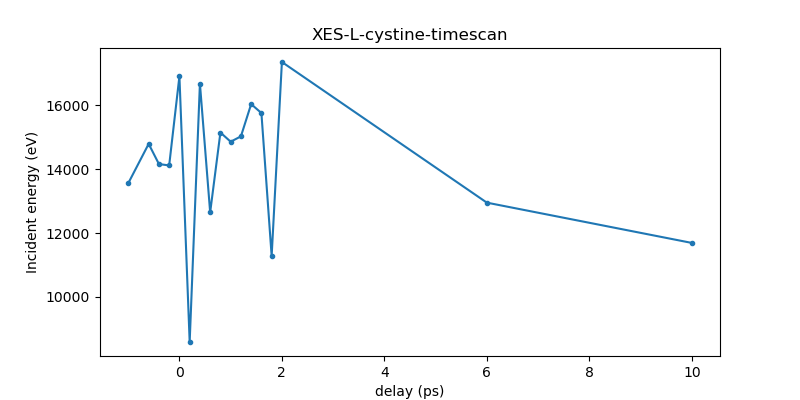

In [33]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure(figsize=(8,4))
plt.plot(Delay_ps, XES_transient_roi1.sum(axis = 1), marker ='.')
plt.xlabel("delay (ps)")
plt.ylabel("Incident energy (eV)")

plt.title(scan_name)
plt.show()


In [193]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Delay_ps,XES_1D, label="", marker='.')
plt.xlabel("Delay (ps)")
plt.ylabel("Counts")
plt.show

<IPython.core.display.Javascript object>

ValueError: setting an array element with a sequence.

In [ ]:
spectrum_ON_roi1, spectrum_ON_roi1_orig = edge_removal(6472, roi1, spectrum_ON_roi1) 
spectrum_OFF_roi1, spectrum_OFF_roi1_orig = edge_removal(6472, roi1, spectrum_OFF_roi1) 

<IPython.core.display.Javascript object>


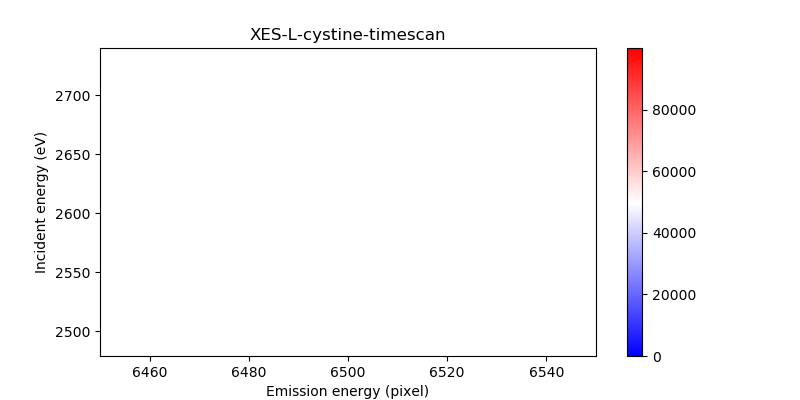

/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Attempting to set identical bottom == top == 2609.619835999909 results in singular transformations; automatically expanding.


In [69]:
RIXS_total = RIXS_unpumped_roi1 + RIXS_pumped_roi1

plt.figure(figsize=(8,4))
plt.imshow(RIXS_total, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.xlabel("Emission energy (pixel)")
plt.ylabel("Incident energy (eV)")

plt.title(scan_name)
plt.colorbar()
plt.show()


<IPython.core.display.Javascript object>


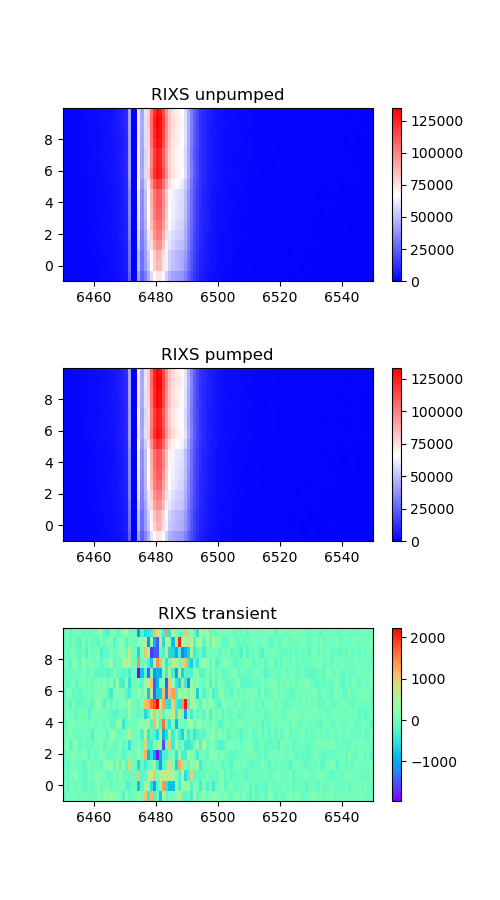

In [179]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Delay_ps[0], Delay_ps[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


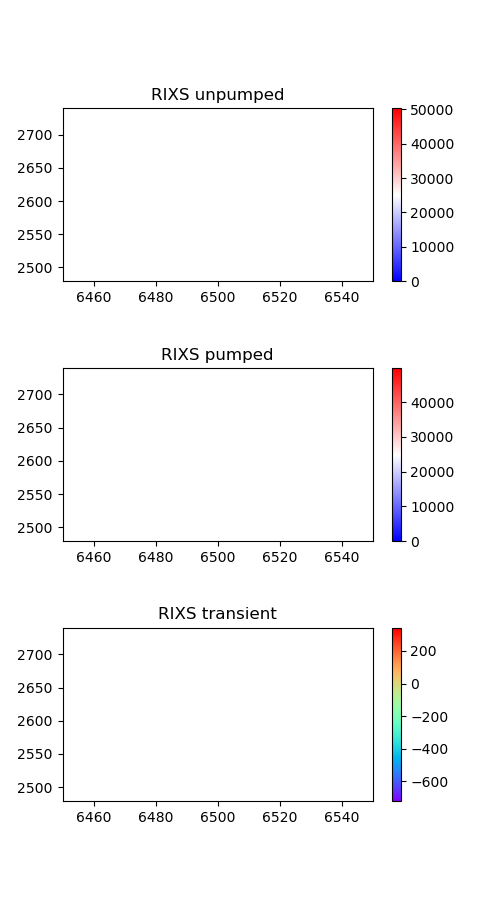

/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: Attempting to set identical bottom == top == 2609.619835999909 results in singular transformations; automatically expanding.
/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Attempting to set identical bottom == top == 2609.619835999909 results in singular transformations; automatically expanding.
/das/work/p18/p18387/anaconda/alvra-analysis-p18387/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: Attempting to set identical bottom == top == 2609.619835999909 results in singular transformations; automatically expanding.


In [65]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

In [ ]:
plt.figure()
plt.plot(Energy_eV,XAS_roi1, label="laser off", marker='.')
plt.plot(Energy_eV,XAS_roi1_on, label="laser on", marker='.')
plt.xlabel("Incident energy (eV)")
plt.ylabel("Counts")
plt.show

In [ ]:
np.sum(np.abs(RIXS_transient_roi1))

In [ ]:
plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Energy_eV,XAS_roi1_on-XAS_roi1, label="", marker='.')
plt.xlabel("Incident energy (eV)")
plt.ylabel("Counts")
plt.show

plt.figure()
plt.plot(x_axis,RIXS_transient_roi1.sum(axis=0), label="", marker='.')
plt.xlabel("Pixels")
plt.ylabel("Counts")
plt.show

plt.figure()
plt.plot(Delay_ps,np.abs(RIXS_transient_roi1).sum(axis=1), label="", marker='.')
plt.xlabel("Delay ps")
plt.ylabel("Counts")
plt.show

<IPython.core.display.Javascript object>


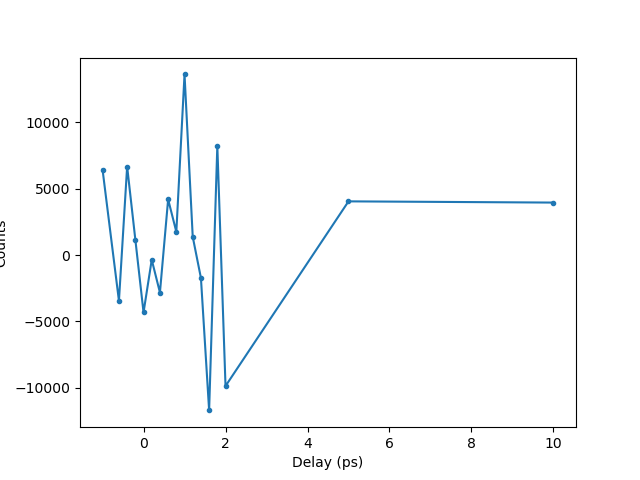

<function matplotlib.pyplot.show(*args, **kw)>

In [161]:
Timezero = 194.6   # position of Timezero on PP delay (in mm!)
Delay_ps = (Delay_mm - Timezero)*2/(3e8*1e3*1e-12) # change to right t0 !

plt.figure()
#plt.plot(Energy_eV,RIXS_transient_roi1, label="", marker='.')
plt.plot(Delay_ps,XAS_roi1_on-XAS_roi1, label="", marker='.')
plt.xlabel("Delay (ps)")
plt.ylabel("Counts")
plt.show

In [ ]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)


plt.subplot(311)
plt.imshow(np.log(RIXS_unpumped_roi1), aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])
plt.title("Log RIXS unpumped")
#plt.pcolor(extent, RIXS_unpumped_roi1, cmap=cm, vmin=-4, vmax=4)
plt.colorbar()
plt.show()


plt.subplot(312)
plt.imshow(np.log(RIXS_pumped_roi1), aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("Log RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Energy_eV[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(5,9))
plt.subplots_adjust(hspace=0.5)

plt.subplot(311)
plt.imshow(RIXS_unpumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])
plt.title("RIXS unpumped")
plt.colorbar()
plt.show()

plt.subplot(312)
plt.imshow(RIXS_pumped_roi1, aspect = 'auto', cmap = "bwr", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])#, vmin=-250, vmax=250)
plt.title("RIXS pumped")
plt.colorbar()
plt.show()

plt.subplot(313)
plt.imshow(RIXS_transient_roi1, aspect = 'auto', cmap = "rainbow", origin ="lower", extent=[roi1[0], roi1[1], Delay_mm[0], Energy_eV[-1]])#, vmin=-0.03, vmax=0.03)
plt.title("RIXS transient")
plt.colorbar()
plt.show()

In [23]:
import os
print (os.getcwd())

/das/work/p18/p18387/alvra_beamline_scripts
